This requires you to write a 2D GAN game. I let you to get into the topic yourself, whitout any explonations from my side. You can watch internet, read papers and tutorials (fun, fun, fun).

### Homework

I want you to implement a simple 2D GAN game. The kind of animation, I want to see is like in [this video](https://www.youtube.com/watch?v=KeJINHjyzOU&feature=youtu.be&t=15m38s) at 15:36 or in [here](https://habrahabr.ru/post/275429/) **but in 2D**. You can google, search code at github, whatever, but the network should be based on TensoFlow.

Basically you will need to come up with true distribution $P$, say mixture of gaussians (surprise me), sample some data from it. Visualize it as a heatmap. To visualize $G$ density you can fix $N$ noise vectors $\{z_i\} \quad i=1,\dots, N$ and draw a circle for each $G(z_i)$. It is also funny to visualize discriminator as a vector field (can be done with `plt.arrow`, `plt.quiver` plot). Look how it should be in the middle of [this page](http://www.inference.vc/an-alternative-update-rule-for-generative-adversarial-networks/).

Please, make sure your code works if 'Run All' is pressed and it draws some animation.

Good luck!

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [72]:
#Generating the data
def get_y(x):
    return 100 * np.sin(x/10)


def sample_data(n=10000, scale=100):
    data = []

    x = scale*(np.random.random_sample((n,))-0.5)

    for i in range(n):
        yi = get_y(x[i])
        data.append([x[i], yi])
    #print (a.shape)
    return np.array(data)

In [3]:
X = tf.placeholder(tf.float32, [None, 2])
Z = tf.placeholder(tf.float32, [None, 2])

In [4]:
def generator(Z, reuse = False):
    with tf.variable_scope("GAN/Generator", reuse = reuse):
        g1 = tf.layers.dense(Z, 16, activation = tf.nn.relu)
        g2 = tf.layers.dense(g1, 16, activation = tf.nn.relu)
        generator_out = tf.layers.dense(g2, 2)
    return generator_out

In [5]:
def discriminator(X, reuse = False):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        d1 = tf.layers.dense(X,16,activation=tf.nn.leaky_relu)
        d2 = tf.layers.dense(d1,16,activation=tf.nn.leaky_relu)
        discriminator_out = tf.layers.dense(d2,1)
    return discriminator_out

In [6]:
fake_sample = generator(Z)
real_logits = discriminator(X)
fake_logits = discriminator(fake_sample, reuse = True)

In [7]:
disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=real_logits,labels=tf.ones_like(real_logits)) 
                           + tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_logits,labels=tf.zeros_like(fake_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_logits,labels=tf.ones_like(fake_logits)))

In [8]:
discriminator_variables = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='GAN/Discriminator')
generator_variables = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='GAN/Generator')

In [9]:
optimizer = tf.train.AdamOptimizer()
discriminator_step = optimizer.minimize(disc_loss, var_list = discriminator_variables)
generator_step = optimizer.minimize(gen_loss, var_list = generator_variables)

100000


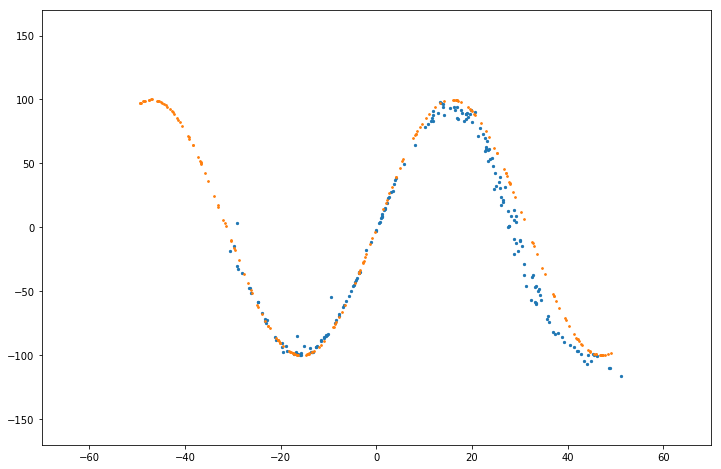

In [82]:
batch_size = 64
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    Z_fixed = np.random.uniform(-1, 2, (200, 2))
    X_fixed = sample_data(200)
    all_data = sample_data(5000)
    for i in range(100001):
        X_batch = all_data[(i*batch_size)%(5000-batch_size):(i*batch_size)%(5000-batch_size)+batch_size,:]
        Z_batch = np.random.uniform(-1, 2, (batch_size, 2))
        _, dloss = sess.run([discriminator_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
        _, gloss = sess.run([generator_step, gen_loss], feed_dict={Z: Z_batch})
        
        if i%100 == 0:
            
            display.clear_output(wait=True)            
            plt.figure(figsize = (12,8))
            fake_X = sess.run([fake_sample], {Z: Z_fixed})[0]
            plt.scatter(fake_X.T[0], fake_X.T[1], s = 5)
            plt.scatter(X_fixed.T[0], X_fixed.T[1], s = 3)
            axes = plt.gca()
            axes.set_xlim([-70,70])
            axes.set_ylim([-170,170])
            print (i)
            plt.show()
            
        #print ("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))